In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [54]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [55]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "../input/leapgestrecog/leapGestRecog"

In [56]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 5, 7, ..., 4, 3, 4],
        [6, 6, 6, ..., 4, 4, 3],
        [5, 6, 6, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 6, 4],
        [6, 5, 5, ..., 5, 6, 4],
        [4, 6, 6, ..., 5, 4, 5]], dtype=uint8),
 0]

In [57]:
# shuffle the input data
import random
random.shuffle(image_data)

In [58]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

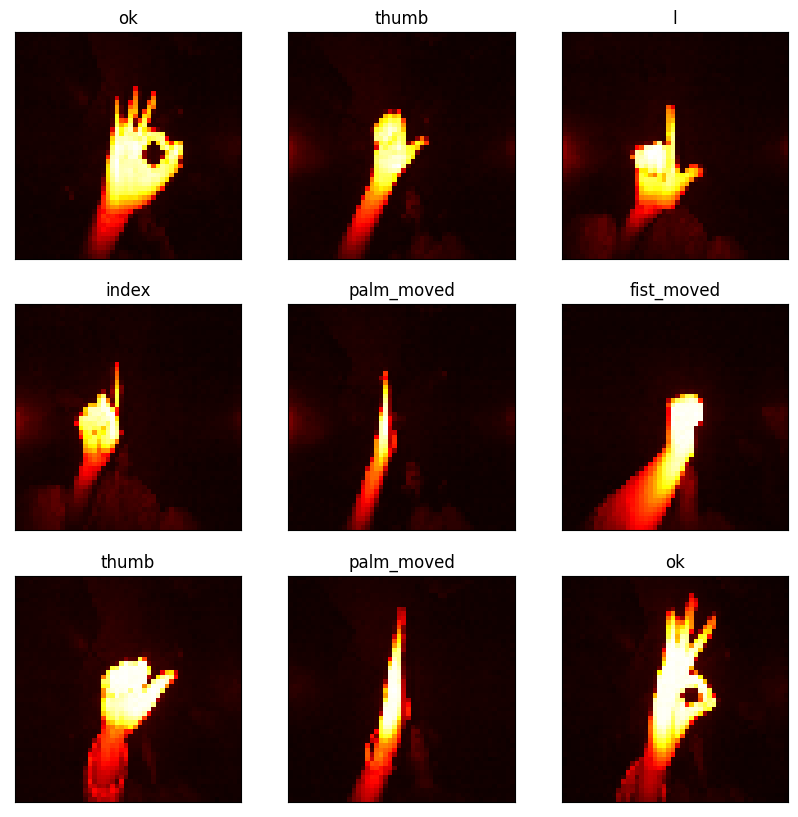

In [59]:
label[:10]
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [60]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

In [61]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [62]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [63]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [64]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [65]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 [==============================] - 90s 202ms/step - loss: 0.8832 - accuracy: 0.6772 - val_loss: 0.0195 - val_accuracy: 0.9945
Epoch 2/7
438/438 [==============================] - 87s 198ms/step - loss: 0.0618 - accuracy: 0.9843 - val_loss: 0.0176 - val_accuracy: 0.9942
Epoch 3/7
438/438 [==============================] - 87s 198ms/step - loss: 0.0282 - accuracy: 0.9939 - val_loss: 0.0012 - val_accuracy: 0.9997
Epoch 4/7
438/438 [==============================] - 84s 191ms/step - loss: 0.0227 - accuracy: 0.9954 - val_loss: 7.9037e-04 - val_accuracy: 0.9997
Epoch 5/7
438/438 [==============================] - 83s 189ms/step - loss: 0.0237 - accuracy: 0.9956 - val_loss: 0.0043 - val_accuracy: 0.9983
Epoch 6/7
438/438 [==============================] - 83s 190ms/step - loss: 0.0085 - accuracy: 0.9975 - val_loss: 6.4616e-04 - val_accuracy: 0.9998
Epoch 7/7
438/438 [==============================] - 84s 191ms/step - loss: 0.0133 - accuracy: 0.9974 - val_loss: 3.1970e-04 - v

In [66]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 [==============================] - 7s 37ms/step - loss: 3.1970e-04 - accuracy: 0.9998
Test accuracy: 99.98%


In [67]:
original_w = model.get_weights()

In [68]:
num_layers=6

In [69]:
accuracys=[]
x=num_layers
for i in range(len(original_w)-2,len(original_w)-1-2*num_layers,-2):
  accuracy=[]
  print("Layer :",x)
  for scalar in [0.001,0.01,0.1,.5, .75,1.5,1.75,2.,4.]:
    new_w=[]
    for w in range(len(original_w)):
      if(w==i):
        new_w.append(original_w[w]*scalar)
      else:
        new_w.append(original_w[w])
    model.set_weights(new_w)
    evaluation = model.evaluate(X_test, y_test)
    print("Scallar {} --> test accuracy {}".format(scalar,evaluation[1]))
    accuracy.append(evaluation[1])
    model.set_weights(original_w)
  x-=1
  model.set_weights(original_w)
  accuracys.append(accuracy)

Layer : 6
188/188 [==============================] - 6s 34ms/step - loss: 2.2672 - accuracy: 0.3870
Scallar 0.001 --> test accuracy 0.3869999945163727
188/188 [==============================] - 6s 34ms/step - loss: 1.9485 - accuracy: 0.9983
Scallar 0.01 --> test accuracy 0.9983333349227905
188/188 [==============================] - 7s 35ms/step - loss: 0.2885 - accuracy: 0.9997
Scallar 0.1 --> test accuracy 0.999666690826416
188/188 [==============================] - 6s 34ms/step - loss: 0.0015 - accuracy: 0.9998
Scallar 0.5 --> test accuracy 0.999833345413208
188/188 [==============================] - 7s 37ms/step - loss: 4.7942e-04 - accuracy: 0.9998
Scallar 0.75 --> test accuracy 0.999833345413208
188/188 [==============================] - 7s 35ms/step - loss: 2.4766e-04 - accuracy: 0.9998
Scallar 1.5 --> test accuracy 0.999833345413208
188/188 [==============================] - 7s 35ms/step - loss: 2.3358e-04 - accuracy: 0.9998
Scallar 1.75 --> test accuracy 0.999833345413208
188/1

In [70]:
average=[]
for i in accuracys:
  average.append(sum(i)/len(i))
print(average)

[0.9315555658605363, 0.88985186152988, 0.841962973276774, 0.8186481528811984, 0.7968518601523505, 0.7812407480345832]


In [71]:
scalars=[0.001,0.01,0.1,.5, .75,1.5,1.75,2.,4.]

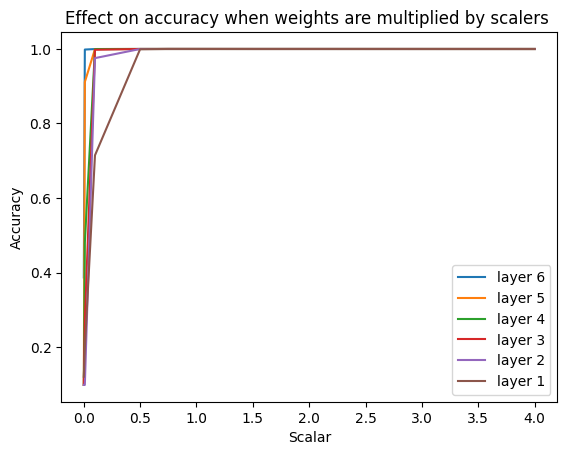

In [72]:
import matplotlib.pyplot as plt
for i in range(len(accuracys)):
  plt.plot(scalars, accuracys[i], label=f'layer {num_layers-i}')
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are multiplied by scalers ')
plt.legend()
plt.show()

In [73]:
accuracys=[]
x=num_layers
for i in range(len(original_w)-2,len(original_w)-1-2*num_layers,-2):
  accuracy=[]
  print("Layer :",x)
  for scalar in [0.001,0.01,0.1,.5, .75,1.5,1.75,2.,4.]:
    new_w=[]
    for w in range(len(original_w)):
      if(w==i):
        new_w.append(original_w[w]+scalar)
      else:
        new_w.append(original_w[w])
    model.set_weights(new_w)
    evaluation = model.evaluate(X_test, y_test)
    print("Scallar {} --> test accuracy {}".format(scalar,evaluation[1]))
    accuracy.append(evaluation[1])
    model.set_weights(original_w)
  x-=1
  model.set_weights(original_w)
  accuracys.append(accuracy)

Layer : 6
188/188 [==============================] - 7s 36ms/step - loss: 3.1970e-04 - accuracy: 0.9998
Scallar 0.001 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 34ms/step - loss: 3.1970e-04 - accuracy: 0.9998
Scallar 0.01 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 34ms/step - loss: 3.1970e-04 - accuracy: 0.9998
Scallar 0.1 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 34ms/step - loss: 3.1970e-04 - accuracy: 0.9998
Scallar 0.5 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 34ms/step - loss: 3.1970e-04 - accuracy: 0.9998
Scallar 0.75 --> test accuracy 0.999833345413208
188/188 [==============================] - 7s 36ms/step - loss: 3.1970e-04 - accuracy: 0.9998
Scallar 1.5 --> test accuracy 0.999833345413208
188/188 [==============================] - 6s 34ms/step - loss: 3.1969e-04 - accuracy: 0.9998
Scallar 1.75 --> test accuracy 0.9998333

In [74]:
average=[]
for i in accuracys:
  average.append(sum(i)/len(i))
print(average)

[0.999833345413208, 0.4737592587868373, 0.388592595855395, 0.38511110842227936, 0.3585370373394754, 0.25727778010898167]


In [75]:
scalars=[0.001,0.01,0.1,.5, .75,1.5,1.75,2.,4.]

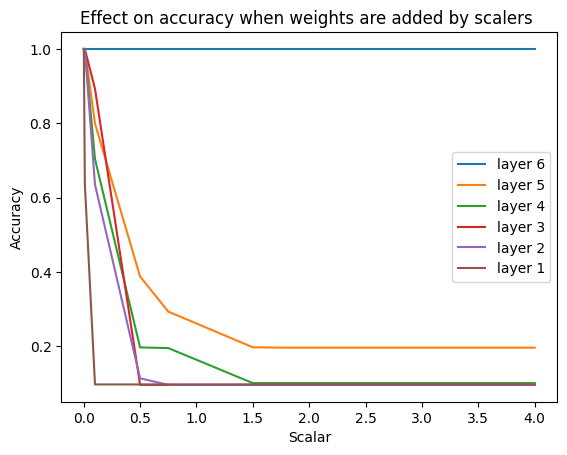

In [76]:
import matplotlib.pyplot as plt
for i in range(len(accuracys)):
  plt.plot(scalars, accuracys[i], label=f'layer {num_layers-i}')
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are added by scalers ')
plt.legend()
plt.show()